In [1]:
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()
import pandas as pd

In [2]:
#data 1 --> from 2018:2020
#data 2 --> 2020:present

data_1 = cg.get_coin_market_chart_range_by_id(id='bitcoin',vs_currency='usd',from_timestamp='1514782800',to_timestamp='1601092800')
data_2= cg.get_coin_market_chart_range_by_id(id='bitcoin',vs_currency='usd',from_timestamp='1601179200',to_timestamp='1681358400')

In [3]:
# gather date and price data and append to lists + create dataframe

date = []
price = []

for i in range(len(data_1['prices'])):
    date.append(data_1['prices'][i][0])
    price.append(data_1['prices'][i][1])


for i in range(len(data_2['prices'])):
    date.append(data_2['prices'][i][0])
    price.append(data_2['prices'][i][1])

df_date = pd.DataFrame(date, columns= ['date'])
df_price = pd.DataFrame(price, columns= ['price'])

df = pd.concat([df_date,df_price], axis =1)

df.head()

,date,price
0,1514851200000,15321.932852
1,1514937600000,15583.885538
2,1515024000000,15976.365194
3,1515110400000,18336.922980
4,1515196800000,18343.662493


In [4]:
# clean dataframe up and change date to human readable format

df['date'] = pd.to_datetime(df['date'], unit = 'ms')
df['date'] = df['date'].dt.date
df['pct_chg'] = df['price'].pct_change()
df = df.dropna()

In [5]:
#calc rolling 90 day volatility
df['vol'] = df['pct_chg'].rolling(90).std()*(252**0.5)

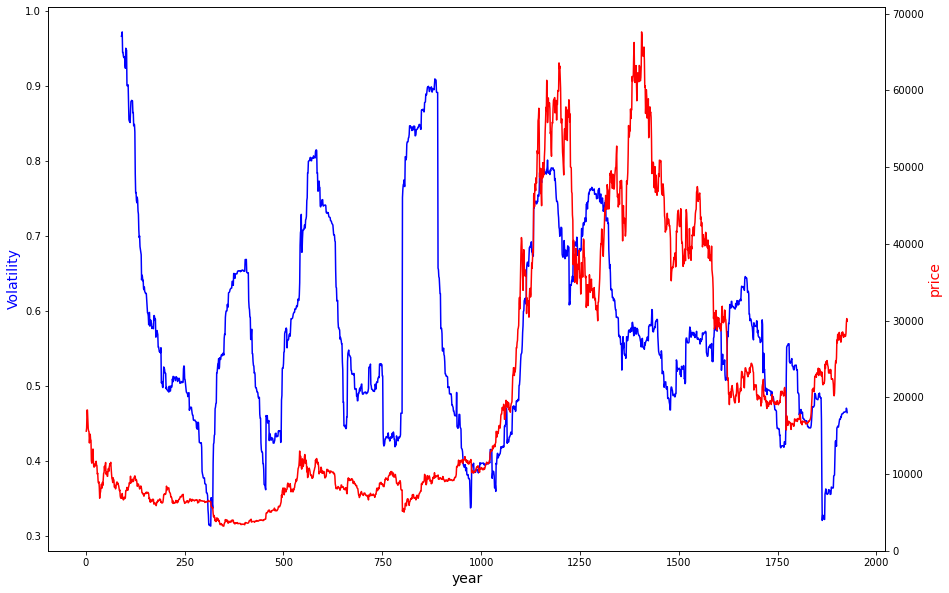

In [6]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)
# make a plot
ax.plot(df.index,
        df['vol'],
        color="blue", 
        )
# set x-axis label
ax.set_xlabel("year", fontsize = 14)
# set y-axis label
ax.set_ylabel("Volatility",
              color="blue",
              fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df.index, df["price"],color="red")
ax2.set_ylabel("price",color="red",fontsize=14)


plt.show()